In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
def PCA(X):
    X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
    S = np.cov(X_std.T)
    Λ,V = np.linalg.eigh(S)
    Y = X_std.dot(V) / np.sqrt(Λ)
    return Y, Λ, V

In [3]:
iris_data = pd.read_csv('/home/dominik/Dokumenty/Studia/Data-mining/Lista3-KMeans/Iris/iris.data', names=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
names = np.unique(iris_data.values[:,-1])
labels = iris_data.values[:,-1]
i = 0
for n in names:
    labels[labels == n] = i
    i += 1
labels = labels.astype(float)

In [5]:
X = np.array(iris_data.values[:,:-1].astype(float))
X.shape

(150, 4)

In [6]:
Y, Λ, V = PCA(X)

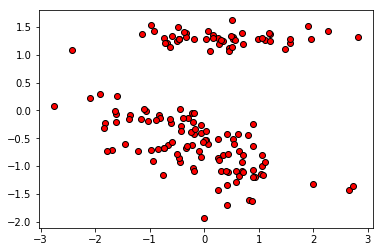

In [7]:
plt.plot(Y[:,2],Y[:,3], 'ko', markerfacecolor='r')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [10]:
def reduceDimensionality(X, Λ, V, k):
    Y = (X * np.sqrt(Λ))[:,-k:].dot(V.T[-k:,:])
    return Y

In [72]:
kmeans = KMeans(n_clusters=3)
G = kmeans.fit(X)

In [86]:
Z_std = np.sqrt(Λ[2]) * Y[:,2,np.newaxis] * V[np.newaxis,:,2] + np.sqrt(Λ[3]) * Y[:,3,np.newaxis] * V[np.newaxis,:,3]
kmeansPCA = KMeans(n_clusters=3)
G_PCA = kmeansPCA.fit(Z_std)

In [93]:
kmeansY = KMeans(n_clusters=3)
G_Y = kmeansY.fit(Y[:,-2:])
G_Y.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

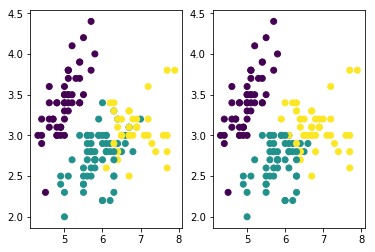

In [88]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], marker='o', c=G.labels_)
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1], marker='o', c=G_PCA.labels_)
plt.show()

In [87]:
print(G_PCA.labels_)
print(G.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [94]:
print('Normal error: ', np.sum((labels != G.labels_).astype(int)))
print('PCA error: ', np.sum((labels != G_PCA.labels_).astype(int)))
print('PCA2 error: ', np.sum((labels != G_Y.labels_).astype(int)))

Normal error:  16
PCA error:  25
PCA2 error:  28


In [98]:
print('Silhouette Coefficient for normal data:', metrics.silhouette_score(X, G.labels_, metric='euclidean'))
print('Silhouette Coefficient for PCA:', metrics.silhouette_score(Z_std, G_PCA.labels_, metric='euclidean'))
print('Silhouette Coefficient for PCA2:', metrics.silhouette_score(Y[:,-2:], G_Y.labels_, metric='euclidean'))

Silhouette Coefficient for normal data: 0.55259194455
Silhouette Coefficient for PCA: 0.508154633952
Silhouette Coefficient for PCA2: 0.478016107461


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
permData = np.random.permutation(np.concatenate((X.T, labels[np.newaxis])).T)
train_data = permData[:100,:4]
train_labels = permData[:100,4]
test_data = permData[100:,:4]
test_labels = permData[100:,4]

In [19]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
np.sum((knn5.predict(test_data) != test_labels).astype(int))

4

In [21]:
permData = np.random.permutation(np.concatenate((Z_std.T, labels[np.newaxis])).T)
train_data = permData[:100,:4]
train_labels = permData[:100,4]
test_data = permData[100:,:4]
test_labels = permData[100:,4]
knnr5 = KNeighborsClassifier(n_neighbors=5)
knnr5.fit(train_data,train_labels)
np.sum((knnr5.predict(test_data) != test_labels).astype(int))

5

In [22]:
permData = np.random.permutation(np.concatenate((Y[:,-2:].T, labels[np.newaxis])).T)
train_data = permData[:100,:-1]
train_labels = permData[:100,-1]
test_data = permData[100:,:-1]
test_labels = permData[100:,-1]
knny5 = KNeighborsClassifier(n_neighbors=5)
knny5.fit(train_data,train_labels)
np.sum((knny5.predict(test_data) != test_labels).astype(int))

4